<a href="https://colab.research.google.com/github/DhruvBarthwal/LangGraph/blob/main/LangGraph3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Input Graph (With Conditon)**

In [4]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
import math

In [5]:
class AgentState(TypedDict):
  values : List[int]
  name : str
  result : str
  operation : str

In [6]:
def processing_node(state : AgentState) -> AgentState:
  """This function handle multiple different inputs"""

  if(state['operation'] == "+"):
    state['result'] = f"Hi {state['name']}, your answer is : {sum(state['values'])}"
  elif(state['operation'] == "*"):
    state['result'] = f"Hi {state['name']}, your answer is : {math.prod(state['values'])}"

  return state

In [7]:
graph = StateGraph(AgentState)
graph.add_node("Calculator", processing_node)
graph.set_entry_point("Calculator")
graph.set_finish_point("Calculator")
app = graph.compile()

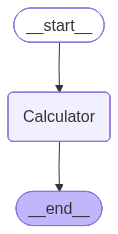

In [9]:
from IPython.display import Image , display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
answer = app.invoke({"name": "Dhruv", "values" : [1,2,3,4], "operation":"+"})

In [11]:
print(answer['result'])

Hi Dhruv, your answer is : 10


In [12]:
answer = app.invoke({"name": "Dhruv", "values" : [1,2,3,4], "operation":"*"})

In [13]:
print(answer["result"])

Hi Dhruv, your answer is : 24
